# Topological Data Analysis - Code

## Setup work environment

In [593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Set hard graphical parameters
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

## Linear  plot

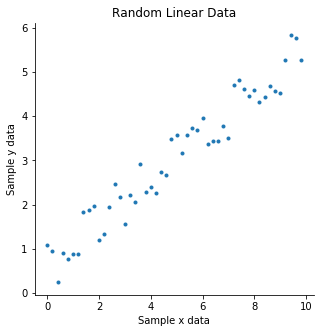

In [594]:
# random linear data
x = np.arange(0,10,0.2)
delta = np.random.uniform(0,1.3, size=(50,))
y = .5 * x + delta

#code to plot linear data
plt.figure(figsize=(5,5))
plt.plot(x,y,'.')
plt.xlabel('Sample x data')
plt.ylabel('Sample y data')
plt.title('Random Linear Data')
plt.savefig('Linear_plot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## Annular plot of $\mathcal{A}$  data

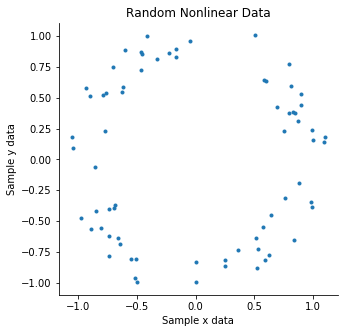

In [595]:
# Generating annular data with polar coordinates (r, theta) and varying by some delta value uniformly randomly chosen
r = np.arange(0.78,1.13,0.005)
# np.arrange gives a sorted linear order so we select a subsequence of radii at random from this arrangement
# this is not truly random but will be sufficient for our visualization
np.random.shuffle(r) 
delta = np.random.uniform(0,1, size=(70,))
theta = np.arange(0,2*np.pi,0.09)

x = (r)*np.cos(theta+delta)
y = (r)*np.sin(theta+delta)
df = np.column_stack((x,y)) # we get a numpy dataframe to manipulate

# Plot annular data
plt.figure(figsize=(5,5))
plt.xlabel('Sample x data')
plt.ylabel('Sample y data')
plt.title('Random Nonlinear Data')
plt.plot(x,y,'.')
#plt.savefig('Circle_plot.png', dpi=360, bbox_inches='tight')
plt.show()
plt.close()

## Clusters\connectedness in $\mathcal{A}$ data

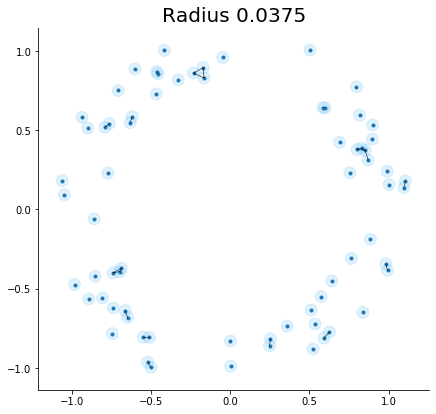

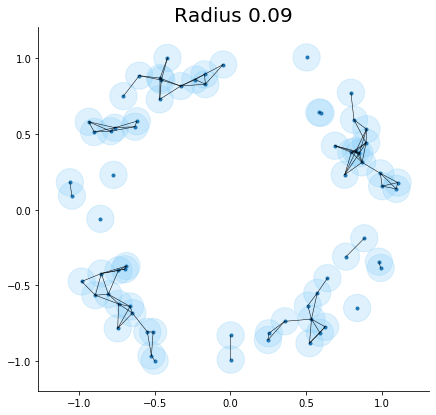

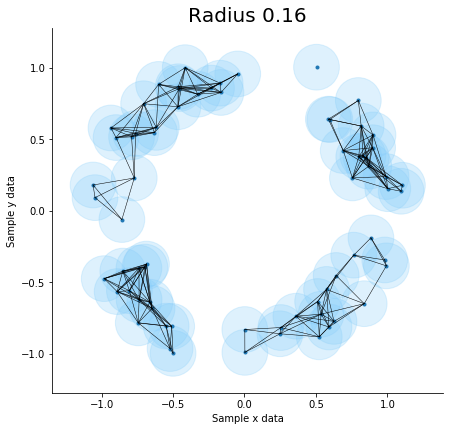

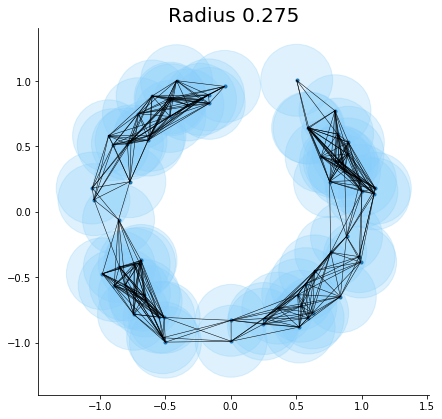

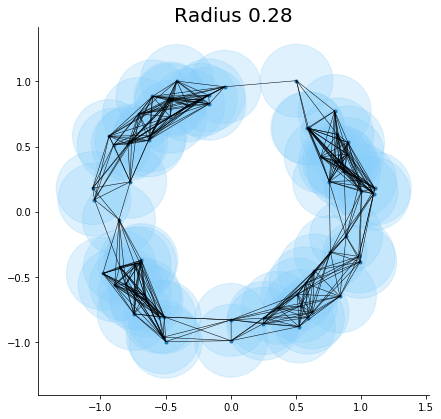

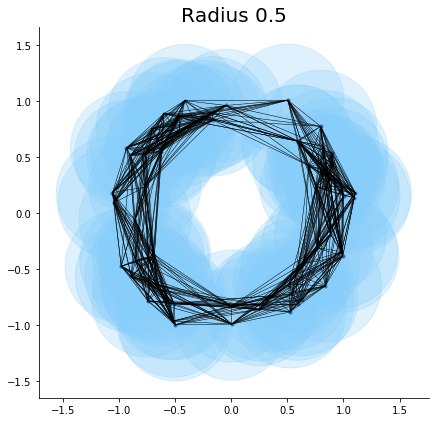

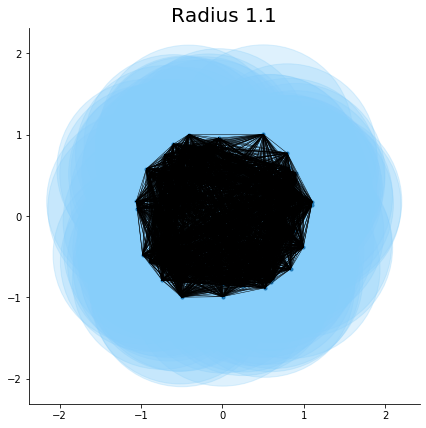

In [596]:
# We need to build an adjacency matrix storing the distance between any two points for a given radius
# Then we can sort by these values for plotting purposes.

adjc_matrix = np.zeros((len(r), len(r)))
distances = np.array([0.075, 0.18, 0.32, 0.55, 0.56, 1, 2.2]) # chosen for graphical properties
radii = distances/2  # we really want the radii of these distances
lines = [] # to store coords of two points for drawing lines given a radius

for dist in distances:
    for i in range(0, adjc_matrix.shape[0]):
        x_vec = df[i]
        for j in range(i+1,adjc_matrix.shape[0]):
            y_vec = df[j]
            d = np.sqrt((x_vec[0]-y_vec[0])**2+(x_vec[1]-y_vec[1])**2)
            adjc_matrix[i,j] = d
            if (d < dist):
                lines.append([x_vec[0], x_vec[1], y_vec[0], y_vec[1],dist/2])
lines = pd.DataFrame(lines)

#Easy way to get all our circles plotted
def create_circle(x1,x2,r):
    circle= plt.Circle((x1,x2), radius= r, color='lightskyblue', alpha=0.27)
    return circle
def show_shape(patch):
    ax=plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')

#we plot for each individual radius:
for rad in radii:
    temp = lines[lines[4] == rad] # 'temp' stores the dataframe filtered by current radius
    
    #graphing parameters:
    plt.figure(figsize=(7,7))
    plt.title('Radius ' + str(rad), fontsize=20)
    plt.plot(x,y,'.') # plot just the annular data points
    
    #plot the lines between the points:
    for i in range(0,temp.shape[0]):
        plt.plot([temp.iloc[i,0],temp.iloc[i,2]],[temp.iloc[i,1],temp.iloc[i,3]],c='black', linewidth = 0.5)
    
    # plot our circles with the functions define just above:
    for i in range(0,len(df)):
        c = create_circle(df[i][0], df[i][1], rad)
        show_shape(c)
    
    # the best example of a clustered graph is seperated out as a feature image in the research paper
    if rad == 0.16:
        plt.xlabel('Sample x data')
        plt.ylabel('Sample y data')
        
    plt.show()
    plt.close('all') # we want a new graph for each radius

## Generating and filtering $\mathcal{A'}$ data

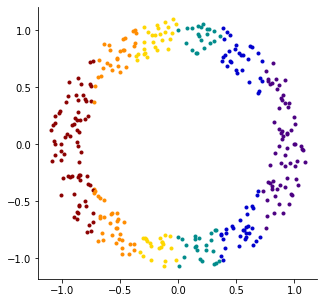

In [601]:
# Same method of generating random circle, just different parameters
R = np.arange(0.8,1.1,0.3/350)
np.random.shuffle(R)
Delta = np.random.uniform(0,1, size=(351,))
Theta = np.arange(0,2*np.pi,2*np.pi/351)
np.random.shuffle(Theta)

X= (R)*np.cos(Theta+Delta)
Y = (R)*np.sin(Theta+Delta)
DF2 = np.column_stack((X,Y))

# We want to work with a pandas dataframe this time for locational indexing
DF2 = pd.DataFrame(DF2)
DF2.columns = ['x', 'y']
DF2['clr'] = pd.cut(DF2.iloc[:,0], bins=6, labels=['darkred',
                                                 'darkorange',
                                                 'gold',
                                                 'darkcyan',
                                                 'mediumblue',
                                                 'indigo'])      #the colors are for 'seeing' the underlying concept

plt.figure(figsize=(5,5))
for i in range(0,DF2.shape[0]):
    my_color = DF2.iloc[i,2]
    plt.plot(DF2.iloc[i,0], DF2.iloc[i,1], '.', color = my_color)
#plt.savefig('filtered_data.png', dpi=360)
plt.show()
plt.close()

# Simplicial Complex of $\mathcal{A}$'

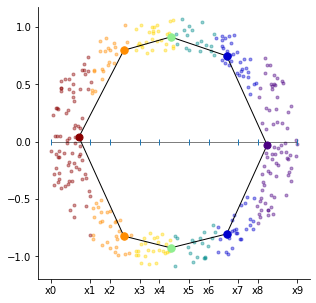

In [598]:
# We take the maxmimum distance with respect to the x-axis and divide into intervals
interval = ((max(DF2.x)-min(DF2.x))/5)
overlap = 0.2*interval #we want 20% overlapping intervals - this is a hyperparameter that can be optimized

#some graphing parameters
plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal', adjustable='box')

#defining our specific overlappig intervals (manually, could be automated)
x0  = min(DF2.x)
x1 = x0 + interval - overlap
x2 = x0 + interval + overlap
x3 = x0 + 2*interval - overlap
x4 = x0 + 2*interval + overlap
x5 = x0 + 3*interval - overlap
x6 = x0 + 3*interval + overlap
x7 = x0 + 4*interval - overlap
x8 = x0 + 4*interval + overlap
x9 = max(DF2.x)

#plotting the intervals with our simiplicial complex
intervals = [x0,x1,x2,x3,x4,x5,x6,x7,x8,x9]
plt.hlines(0,x0,x9,linewidth=0.5)
plt.plot(intervals,np.zeros(len(intervals)),'|')

# initialize an empty datafrae to store averages of our 8 points as we define them
cl_lines = pd.DataFrame(index=range(0,8), columns=['x','y'], dtype='float')

########## DELETE 'k'
k=1
for i in [0,1,3,5,7]:      
    if i == 0 or i == 7:
        data = DF2[(intervals[i] <= DF2.x) & (DF2.x <= intervals[i+2])]
        X = data.x
        Y = data.y
        X_avg = np.average(X)
        Y_avg = np.average(Y)
        if i ==0:
            cl_lines.iloc[0,0] = X_avg
            cl_lines.iloc[0,1] = Y_avg
            plt.scatter(X_avg,Y_avg,color = 'darkred', zorder=10,s=50)
        else: 
            cl_lines.iloc[4,0] = X_avg
            cl_lines.iloc[4,1] = Y_avg
            plt.scatter(X_avg,Y_avg,color = 'indigo', zorder=10,s=50)
    else: # i = 3,5,7
        data = DF2[(intervals[i] <= DF2.x) & (DF2.x <= intervals[i+3])]
        X = data.x
        Y = data.y
        X_avg = np.average(X)
        Ypos = Y[Y >= 0]
        Yneg = Y[Y<0]
        Ypos_avg = np.average(Ypos)
        Yneg_avg = np.average(Yneg)
        cl_lines.iloc[k,0] = X_avg #pos point
        cl_lines.iloc[k,1] = Ypos_avg
        cl_lines.iloc[(8-k),0] = X_avg #neg point
        cl_lines.iloc[(8-k),1] = Yneg_avg
        if i == 1:
            my_color = 'darkorange'
        if i == 3:
            my_color = 'lightgreen'
        if i == 5:
            my_color = 'mediumblue'
        plt.scatter(X_avg,Ypos_avg, color = my_color, zorder=10,s=55)
        plt.scatter(X_avg,Yneg_avg, color = my_color, zorder=10,s=55)  
        ######## DELETE 'k'
        k += 1
plt.xticks(ticks = intervals, labels = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9'])

for i in range(0,DF2.shape[0]):
    my_color = DF2.iloc[i,2]
    plt.plot(DF2.iloc[i,0], DF2.iloc[i,1], '.', color = my_color, alpha=0.4, zorder=0)

for i in range(0,8):
    if i + 1 == 8:
        k = 0
    else:
        k = i + 1
    plt.plot((cl_lines.iloc[i,0], cl_lines.iloc[k,0]), 
             (cl_lines.iloc[i,1], cl_lines.iloc[k,1]), color='black', linewidth=1, zorder=5)



#plt.savefig('simplicial.png', dpi=360)
plt.show()

# Returning to Simplicial Complex of $\mathcal{A}$

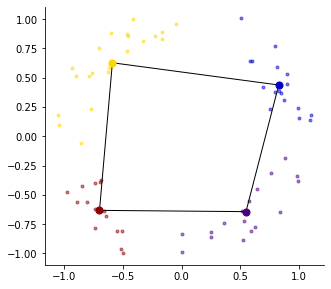

In [599]:
cl = pd.DataFrame(df)
cl1 = cl[(cl[0] >= -1.2) & (cl[0] <=-0.4) & (cl[1] >= -1.2)  & (cl[1] <= -0.25)]
cl2 = cl[(cl[0] >= -1.2) & (cl[0] <= 0)   & (cl[1] >= -0.25) & (cl[1] <= 1.2)]
cl3 = cl[(cl[0] >= 0)    & (cl[0] <=1.2)  & (cl[1] >=  0)    & (cl[1] <= 1.2)]
cl4 = cl[(cl[0] >= -0.1) & (cl[0] <=1.2) & (cl[1] >= -1.2)  & (cl[1] <= 0)]

cl = [cl1,cl2,cl3,cl4]

my_color2 = ['darkred','gold','mediumblue','indigo']

plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal', adjustable='box')

for i in range(0,4):
    plt.plot(cl[i][0], cl[i][1],'.', color = my_color2[i], alpha=0.5 , zorder=0)

cl_lines2 = []
for i in range(0,4):
    X_avg = np.average(cl[i][0])
    Y_avg = np.average(cl[i][1])
    plt.scatter(X_avg,Y_avg,  color=my_color2[i], s=50, zorder = 10)
    cl_lines2.append((X_avg,Y_avg))

for i in range(0,4):
    if i + 1 == 4:
        k = 0
    else:
        k = i + 1
    plt.plot((cl_lines2[i][0], cl_lines2[k][0]), (cl_lines2[i][1], cl_lines2[k][1]), color='black', linewidth=1, zorder=5)


#plt.savefig('clusters.png', dpi=360)
plt.show()